# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Per-Task Baseline Models
This notebook contains the _baseline models_ for each task. This allows us to get a quick understanding of the predictive features for each task (separately).



# Train Model on CSOP I and Test on CSOP II

In [3]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [4]:
csop_model.select_target(target = "zscore_efficiency")

In [5]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3927	MAE: 0.5232	MSE: 0.586	RMSE: 0.7655
Validation Set:	R2: 0.244	MAE: 0.7147	MSE: 0.986	RMSE: 0.993
Test Set:	R2: 0.1353	MAE: 0.7025	MSE: 0.8638	RMSE: 0.9294


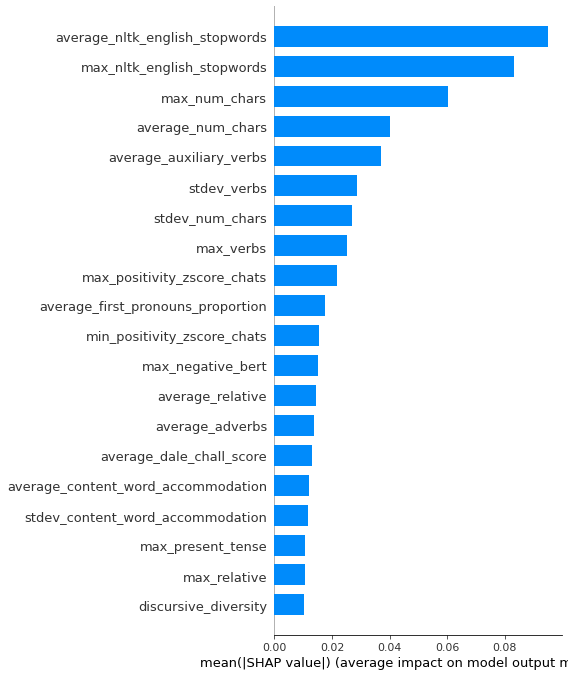

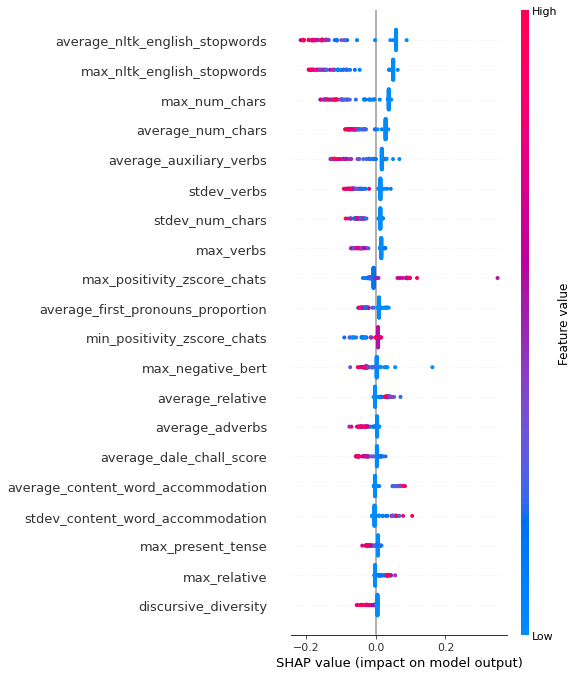

In [6]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [7]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [8]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3791	MAE: 0.5278	MSE: 0.6232	RMSE: 0.7894
Validation Set:	R2: 0.1871	MAE: 0.656	MSE: 0.7997	RMSE: 0.8943


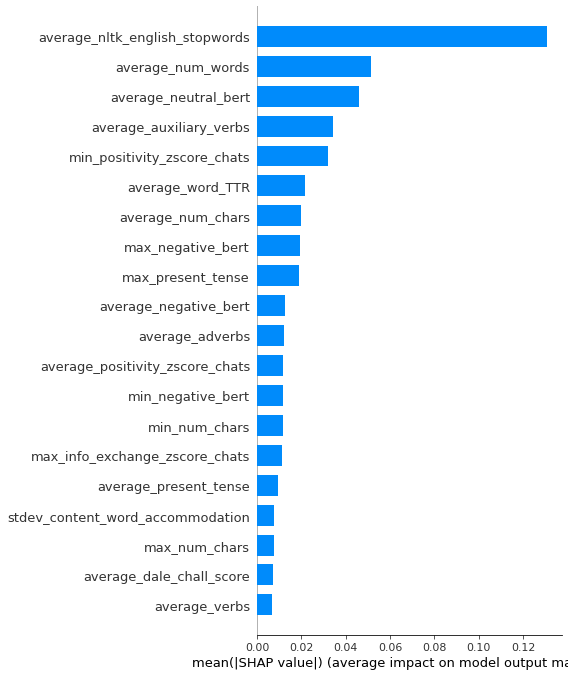

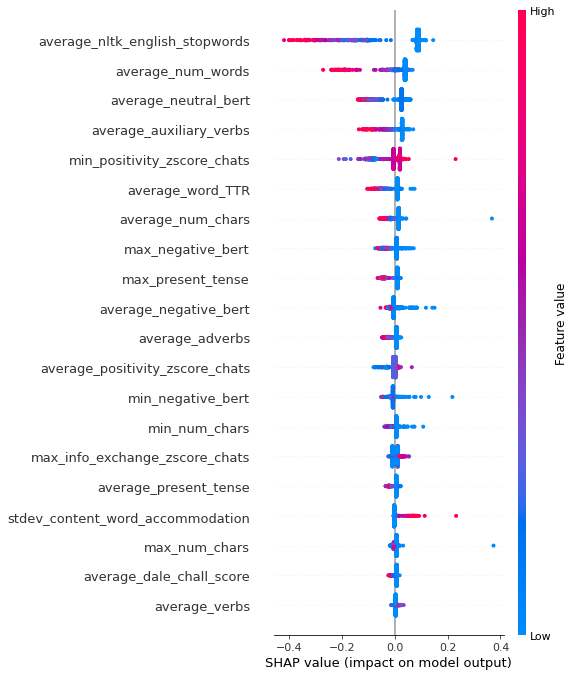

In [9]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model, val_size = 0.2, test_size = None)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.3793	MAE: 0.5272	MSE: 0.623	RMSE: 0.7893
Validation Set:	R2: 0.1931	MAE: 0.6548	MSE: 0.7939	RMSE: 0.891


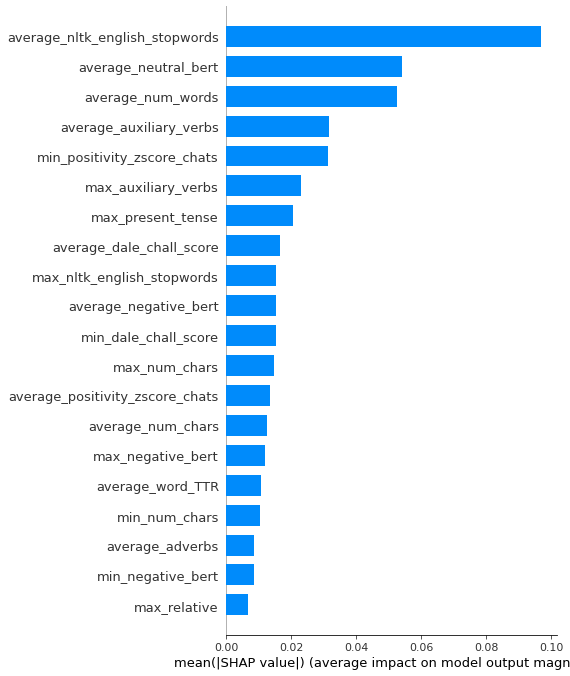

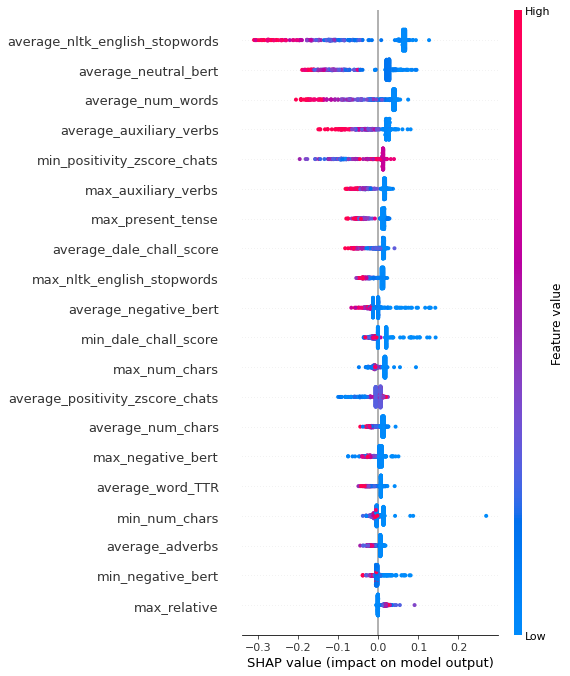

In [10]:
# What happens when we standardize within all datasets?
csop_blended_model_within = ModelBuilder(dataset_names = ["csop", "csopII"], standardize_within=True)
csop_blended_model_within.select_target(target=["zscore_efficiency", "efficiency"])
csop_blended_model_within.define_model(model_type = 'rf')
csop_blended_model_within.evaluate_model(csop_blended_model_within.baseline_model, val_size = 0.2, test_size = None)

# Juries Model

In [11]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [12]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8645	MAE: 0.3195	MSE: 0.1359	RMSE: 0.3686
Validation Set:	R2: 0.1051	MAE: 0.7637	MSE: 0.8448	RMSE: 0.9191


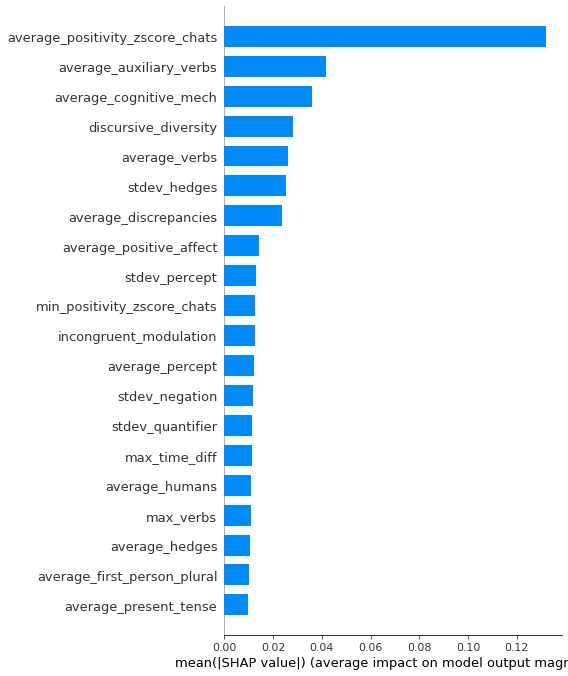

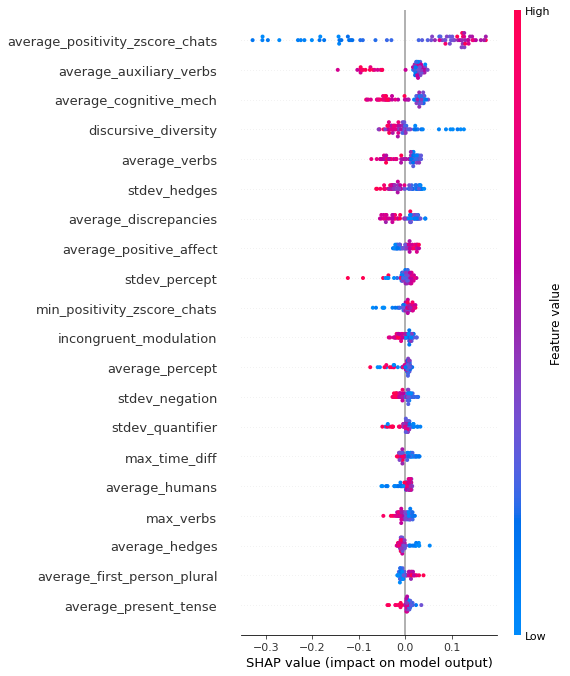

In [13]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model, val_size = 0.2, test_size = None)

# Multi-Task Joint Model

In [14]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [15]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [16]:
# standardize_within defaults to false, so let's check what happens when we change it to true
joint_model_std_within = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= True)

In [17]:
joint_model_std_within.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.5173	MAE: 0.3719	MSE: 0.4902	RMSE: 0.7001
Validation Set:	R2: 0.1289	MAE: 0.6775	MSE: 0.8145	RMSE: 0.9025


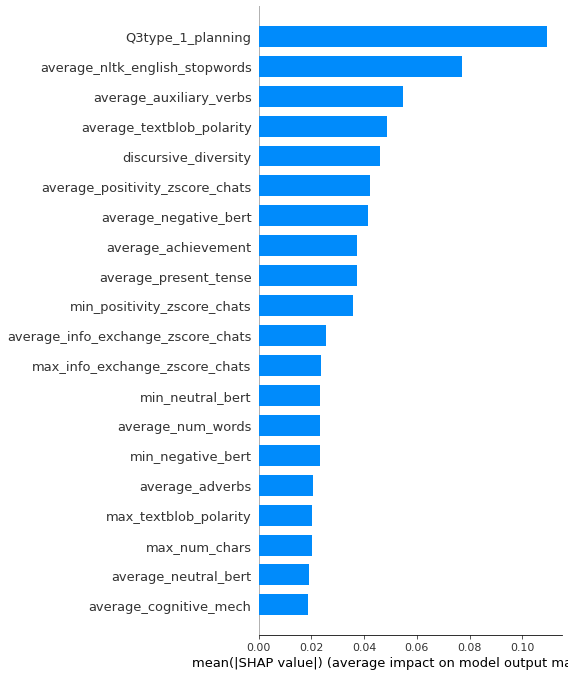

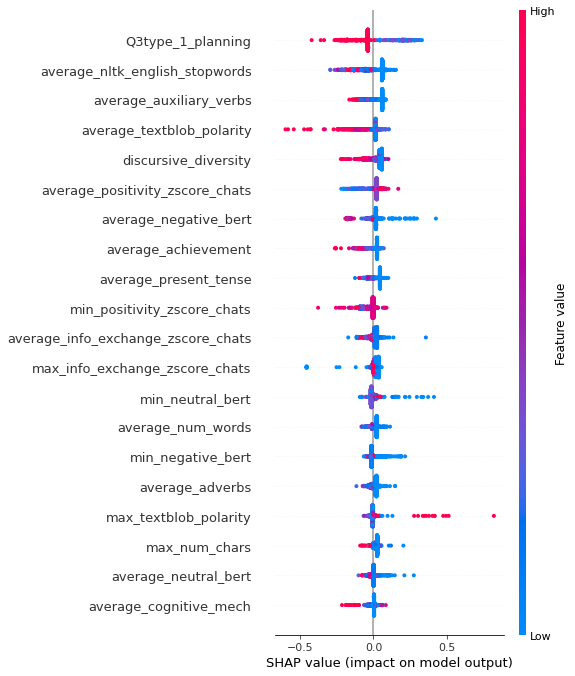

In [18]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model, val_size = 0.2, test_size = None)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.1638	MAE: 0.6937	MSE: 0.8492	RMSE: 0.9215
Validation Set:	R2: 0.1121	MAE: 0.6941	MSE: 0.8302	RMSE: 0.9112


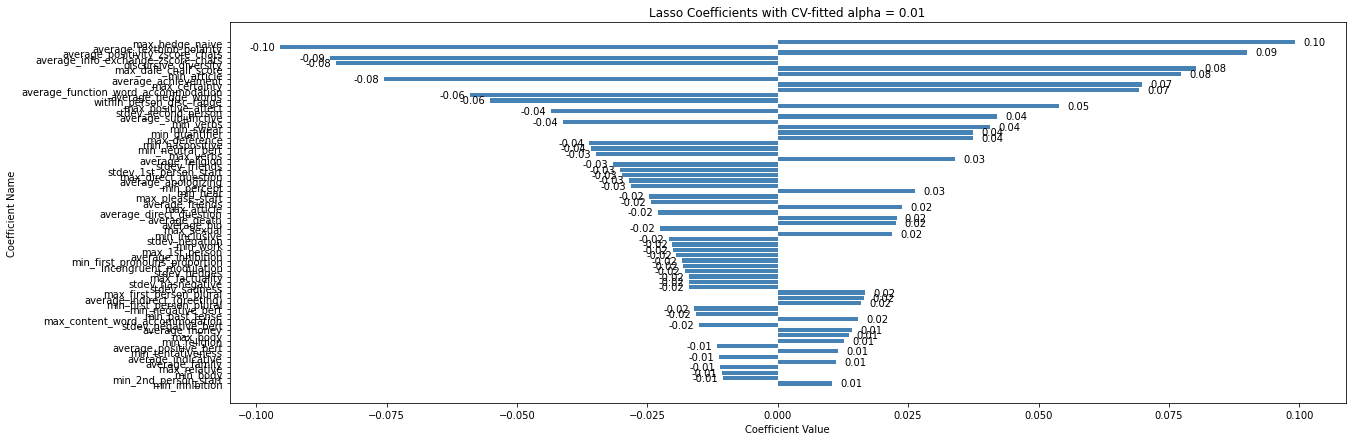

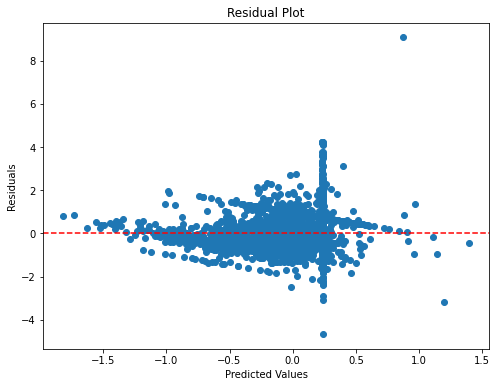

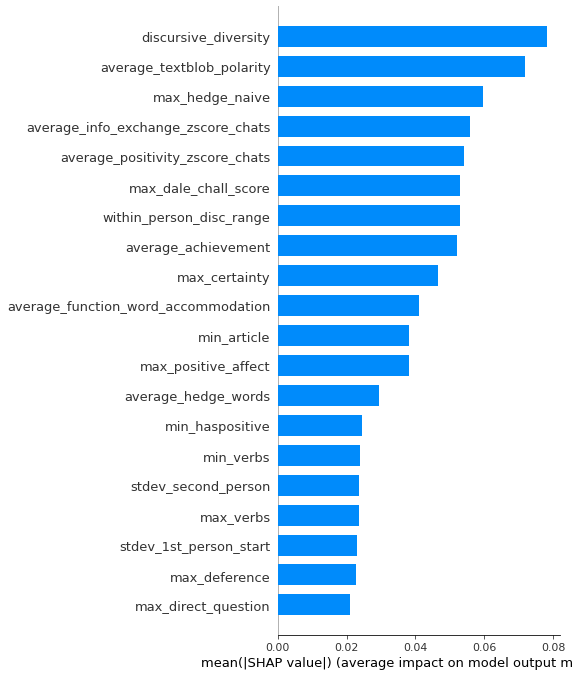

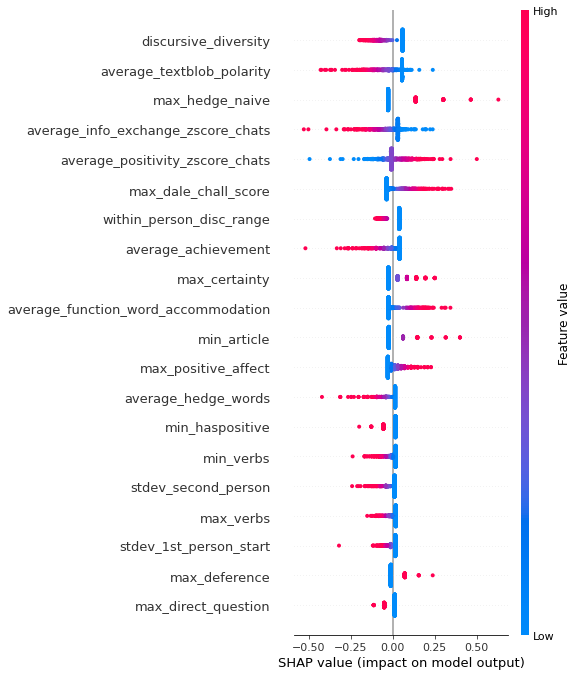

In [19]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model, val_size = 0.2, test_size = None)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.1287	MAE: 0.7278	MSE: 0.8848	RMSE: 0.9406
Validation Set:	R2: -0.3432	MAE: 0.8539	MSE: 1.2559	RMSE: 1.1207


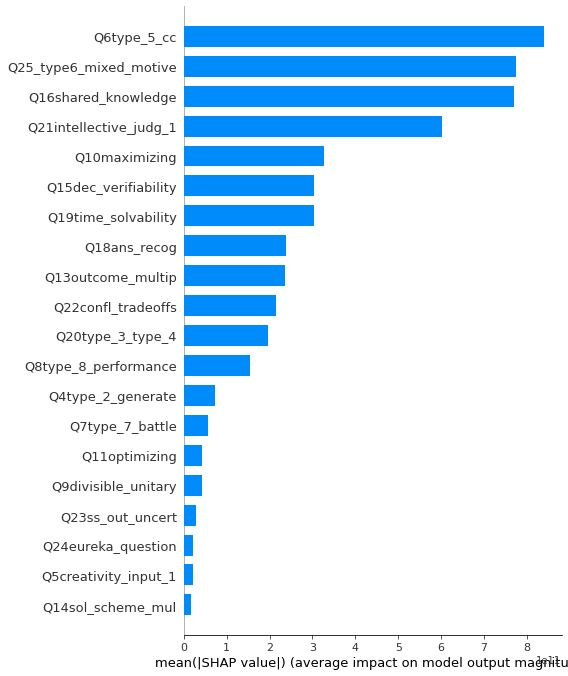

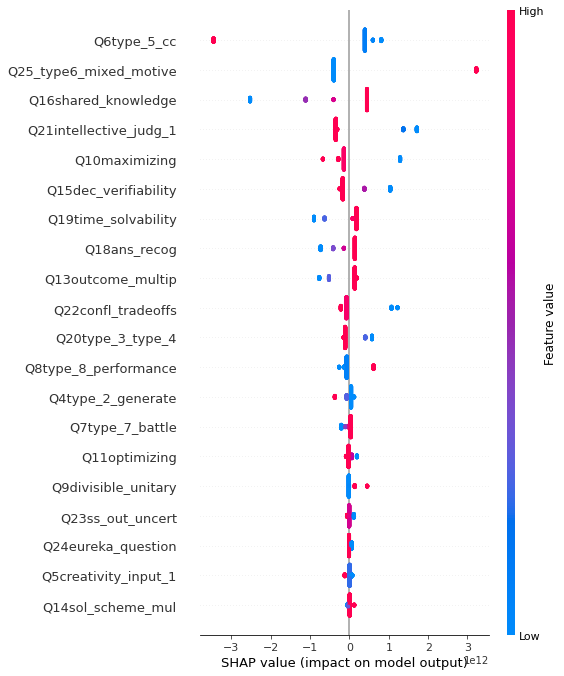

In [20]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model, val_size = 0.2, test_size = None)

## Random Forest

In [21]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model, val_size = 0.2, test_size = None)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done


Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4634	MAE: 0.4847	MSE: 0.5449	RMSE: 0.7382
Validation Set:	R2: 0.1808	MAE: 0.6606	MSE: 0.766	RMSE: 0.8752


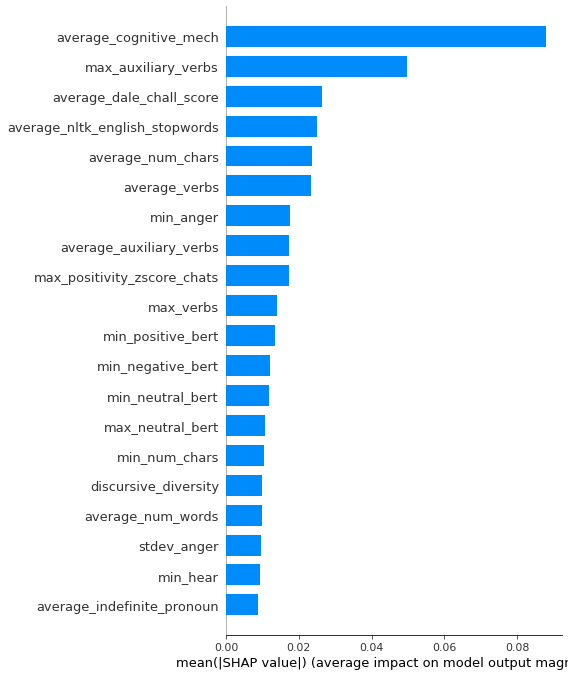

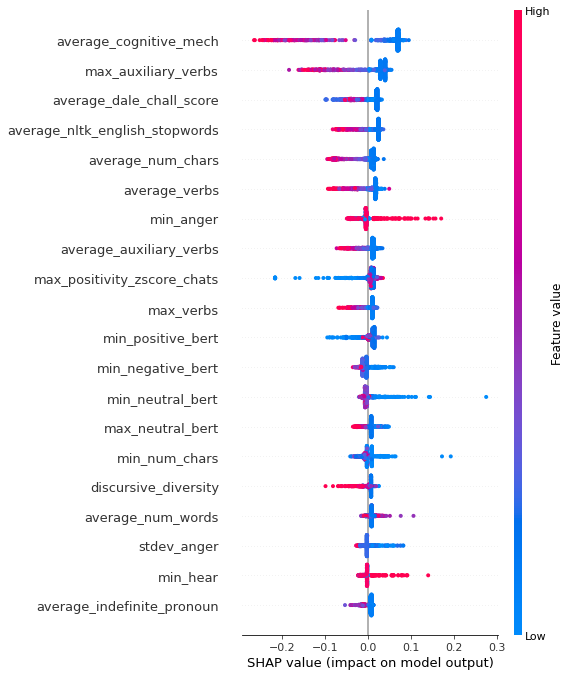

In [ ]:
# compare to within-standardized version
joint_model_std_within.define_model(model_type = 'rf')
joint_model_std_within.evaluate_model(joint_model_std_within.baseline_model, val_size = 0.2, test_size = None)